<a href="https://colab.research.google.com/github/kianahs/AI_coursework_2/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Lost in the closet (Classification)

You are an artist who secluded yourself for years to come up with the perfect design for a new brand
of clothes. However, your time off from civilisation was not so beneficial since you cannot distinguish
a T-shirt from a dress or a sneaker from a sandal any more. In order to address that issue, you choose
to train a Convolutional Neural Network (using PyTorch) that will help you identify each cloth to
match the perfect design you created. In order to train it, you decide to rely on the dataset fashion
MNIST (https://github.com/zalandoresearch/fashion-mnist).
You can access the data using the following lines (we strongly advise you to copy this code from the
fashion mnist.py file attached to this coursework):


In [ ]:
import torchvision
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#download train and test data and transform them to tensors
train_set = torchvision.datasets.FashionMNIST(root = ".", train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.FashionMNIST(root = ".", train=False, download=True, transform=transforms.ToTensor())
#convert train and test data to batches of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)
# Fix the seed to be able to get the same randomness across runs
# and hence reproducible outcomes
torch.manual_seed(0)


# If you are using CuDNN , otherwise you can just ignore
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

100%|██████████| 26421880/26421880 [00:02<00:00, 10855494.34it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 182989.39it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3235561.04it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20922749.02it/s]


Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



Label is: 3
Dimension of input data: torch.Size([32, 1, 28, 28])
Dimension of labels: torch.Size([32])


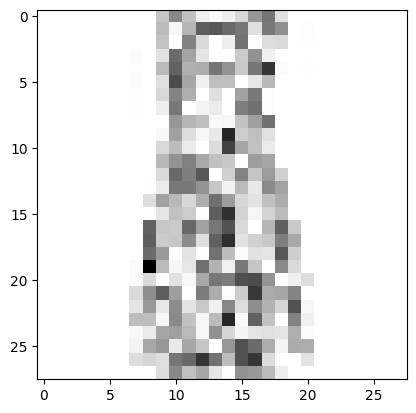

In [ ]:
# plotting one of the samples of train data
input_data, label = next(iter(train_loader))
plt.imshow(input_data[0,:,:,:].numpy().reshape(28,28), cmap="gray_r");
print("Label is: {}".format(label[0]))
print("Dimension of input data: {}".format(input_data.size()))
print("Dimension of labels: {}".format(label.size()))

1. Given the problem, what is the most appropriate loss function to use? Provide the name of the
loss, its formula and the formula interpretation in your report.
This question carries 10% of the mark for this coursework.

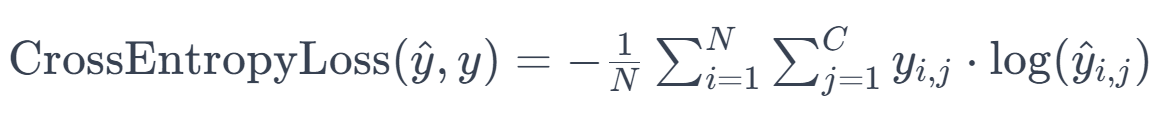

2. Create and train a Convolutional Neural Network corresponding to the following architecture
(also see the diagram below):
1. Input image size: 28 × 28 × 1 (height × width × number of channels).
2. First convolutional layer: Kernel size (5 × 5), Stride size (1 × 1) and 32 output channels.
Activation function.
3. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
4. Second convolutional layer: Kernel size (5×5), Stride size (1 × 1) and 64 output channels.
Activation function.
5. Max pooling layer: Kernel size (2 × 2) and Stride size (2 × 2).
6. First fully-connected layer with input size being the output size of max pooling layer in 5.
(flattened, i.e. 1024) and output size 1024. Activation function.
7. Second fully-connected layer with input size being the output size of fully connected layer in
6. (i.e. 1024) and output size 256. Activation function.
8. Output layer with input size being the output size of fully-connected layer in 7. (i.e. 256)
and output size 10.


For training, initialise your weights using the Xavier Uniform initialisation, use ReLU as the
activation function, a learning rate of 0.1 with the SGD optimiser. You will train your neural
network for 30 epochs. In your report, provide the following: (a) final (train and test) accuracy
obtained; (b) plot of the accuracy on the training and test sets per each epoch, comment on the
speed of performance changes across epochs; (c) plot of the train loss per epoch (total sum of
per batch losses for each epoch) and comment on the speed of decrease.
This question carries 15% of the mark for this coursework.


In [ ]:
# CNN implementation
# CNN class
class MyCNN(nn.Module):
  # defining the constructor which needs the activation function as its input
  def __init__(self, activation_function):
    super(MyCNN, self).__init__()
    # TO DO

    #  use the Sequential container to run layers sequentially

    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride=2),
                                   nn.Conv2d(32, 64, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride = 2))

    # use the Sequential container to run layers sequentially

    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), activation_function, nn.Linear(1024,256), activation_function, nn.Linear(256, 10))

  def forward(self, x):
    # TO DO
    # use the Sequential container to run layers sequentially
    # pass the input to the cnn model
    x = self.cnn_model(x)
    # reshape the result
    x = x.view(x.size(0), -1)
    # x = x.view(-1, 1024)
    # pass result to the fully connected model
    x = self.fc_model(x)
    # return the output
    return x



In [ ]:
# function to evaluate the models performance by calculating its accuracy
def evaluation(dataloader):
  # define variables to store total and correct number of predicitons
  total, correct = 0,0
  # go to model evaluation mode
  net.eval()
  # for each batch of data in data loader
  for data in dataloader:
    # TO DO
    # we get batches inputs and labels
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)
    # we pass the inputs to the network and get outputs
    outputs = net(inputs)
    # we take maximum value of predicitons along the axis 1
    _, pred = torch.max(outputs.data, 1)
    # we add the number of predictions we did in this batch to the total number of predictions variable
    total += labels.size(0)
    # if we do a correct prediciton (match with the label of the data) we count it and add it to the number of correct predicitons
    correct += (pred == labels).sum().item()
    # we return the division of correct predictions on all predicitons which is the accuracy and multiply it by 100 to show the percentage
  return 100 * correct / total


# def test_evaluation(dataloader):
#     total, correct = 0,0
#     net.eval()
#     with torch.no_grad():
#       for data in dataloader:
#         # TO DO
#         inputs, labels = data
#         inputs, labels = inputs.to(device), labels.to(device)
#         outputs = net(inputs)
#         _, pred = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (pred == labels).sum().item()
#       return 100 * correct / total

# define a function for initialising the weights from xavier_unifrom
def weights_init(layer):
    if isinstance(layer, nn.Linear):
      # TO DO
      nn.init.xavier_uniform_(layer.weight)

# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with ReLU actiovation on device
net = MyCNN(nn.ReLU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization with learning rate 0.1
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

# define train function for each net loss opt device and data loader
def train(net, loss_fn, opt, device, train_loader):
    # usee lists to store loss, accuracy for train and test in each epoch
    loss_epoch_array = []
    max_epochs = 30
    loss_epoch = 0
    train_accuracy = []
    test_accuracy = []
    # for each epoch
    for epoch in range(max_epochs):
      loss_epoch = 0
      # for each batch of data
      for i, data in enumerate(train_loader, 0):
        # TO DO
        # go to training mode
        net.train()
        # get inputs and labels of the batch we are in
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # Zero the gradients
        opt.zero_grad()
        # pass the inputs to the network and get the outputs
        outputs = net(inputs)
        # calculate loss by comparing predicitons and labels
        loss = loss_fn(outputs, labels)
        # do the backward pass
        loss.backward()
        # updating model parameters
        opt.step()
        # add the losss to the epoch loss
        loss_epoch += loss.item()
        # TO DO
      # store loss, train and test accuracies into lists, print and return them
      loss_epoch_array.append(loss_epoch)
      train_accuracy.append(evaluation(train_loader))
      test_accuracy.append(evaluation(test_loader))
      print("Epoch {}: loss: {}, train accuracy: {}, test accuracy:{}".format(epoch + 1, loss_epoch_array[-1], train_accuracy[-1], test_accuracy[-1]))

    return loss_epoch_array, train_accuracy,test_accuracy

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

cuda:0
Epoch 1: loss: 926.141174428165, train accuracy: 88.35, test accuracy:87.33
Epoch 2: loss: 586.3934936486185, train accuracy: 90.565, test accuracy:89.07
Epoch 3: loss: 499.3725114259869, train accuracy: 91.865, test accuracy:89.97
Epoch 4: loss: 443.9568430427462, train accuracy: 92.75, test accuracy:90.34
Epoch 5: loss: 396.4219669075683, train accuracy: 93.375, test accuracy:90.73
Epoch 6: loss: 355.27731516957283, train accuracy: 94.15666666666667, test accuracy:90.67
Epoch 7: loss: 318.74468869529665, train accuracy: 94.29166666666667, test accuracy:90.96
Epoch 8: loss: 287.71763736754656, train accuracy: 94.88166666666666, test accuracy:90.71
Epoch 9: loss: 257.4449592079036, train accuracy: 96.335, test accuracy:91.14
Epoch 10: loss: 227.0914052678272, train accuracy: 96.16, test accuracy:91.02
Epoch 11: loss: 204.01663074013777, train accuracy: 96.705, test accuracy:91.18
Epoch 12: loss: 184.05031437857542, train accuracy: 97.04666666666667, test accuracy:91.28
Epoch 13:

In [ ]:
# print(label)

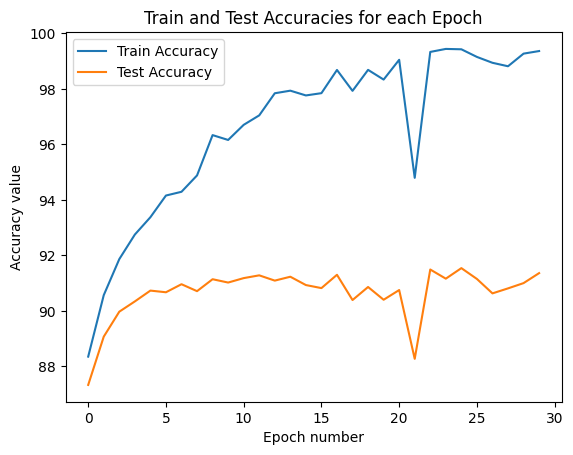

In [ ]:
# plotting accuracies of train and test data for each epoch
def plot_accuracies(train_accuracy,test_accuracy):
  plt.plot(train_accuracy, label='Train Accuracy')
  plt.plot(test_accuracy, label='Test Accuracy')
  plt.title('Train and Test Accuracies for each Epoch')
  plt.xlabel('Epoch number')
  plt.ylabel('Accuracy value')
  plt.legend()
  plt.show()

plot_accuracies(train_accuracy,test_accuracy)

In [ ]:
# input_data[0,:,:,:].numpy().shape

In [ ]:
# label

In [ ]:
# input_data[0,:,:,:].numpy()

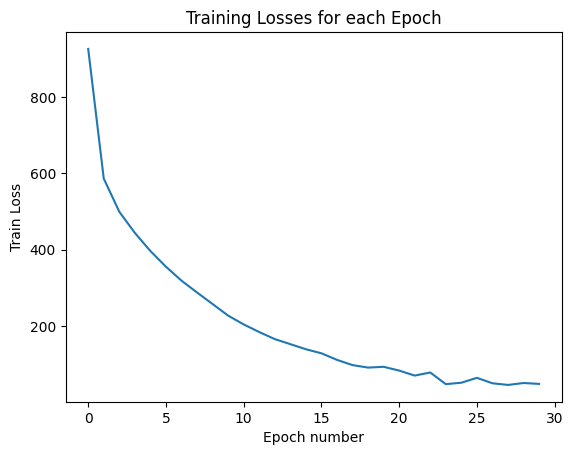

In [ ]:
#plotting loss of training process for each epoch
def plot_loss_epoch(loss_epoch_array):
  plt.plot(loss_epoch_array)
  plt.title('Training Losses for each Epoch')
  plt.xlabel('Epoch number')
  plt.ylabel('Train Loss')
  plt.show()

plot_loss_epoch(loss_epoch_array)

In [ ]:
# printing the final train and test accuracies
def show_final_accuracies(train_accuracy,test_accuracy):

  print("Last Train Accuracy: {} Last Test Accuracy: {}".format(train_accuracy[-1], test_accuracy[-1]))

show_final_accuracies(train_accuracy,test_accuracy)

Last Train Accuracy: 99.365 Last Test Accuracy: 91.36


3. Run three experiments each time changing all the current activation functions to one of the
following: Tanh, Sigmoid and ELU. In your report, provide only the final classification accuracy
values (train and test) per activation function and comment on the result.
This question carries 6% of the mark for this coursework.


cuda:0
Epoch 1: loss: 847.3525814786553, train accuracy: 88.14666666666666, test accuracy:86.72
Epoch 2: loss: 582.4355650097132, train accuracy: 85.93833333333333, test accuracy:84.39
Epoch 3: loss: 492.1924566272646, train accuracy: 91.55333333333333, test accuracy:88.96
Epoch 4: loss: 426.1404149401933, train accuracy: 93.055, test accuracy:89.84
Epoch 5: loss: 374.0916214827448, train accuracy: 94.12833333333333, test accuracy:90.19
Epoch 6: loss: 328.1643049651757, train accuracy: 94.925, test accuracy:90.04
Epoch 7: loss: 282.7925646980293, train accuracy: 95.04, test accuracy:89.93
Epoch 8: loss: 248.74863936705515, train accuracy: 96.745, test accuracy:91.05
Epoch 9: loss: 211.11018641048577, train accuracy: 96.77833333333334, test accuracy:90.3
Epoch 10: loss: 178.36245795025025, train accuracy: 96.94, test accuracy:90.17
Epoch 11: loss: 147.2081416885485, train accuracy: 97.805, test accuracy:90.77
Epoch 12: loss: 119.88508551818086, train accuracy: 98.49666666666667, test ac

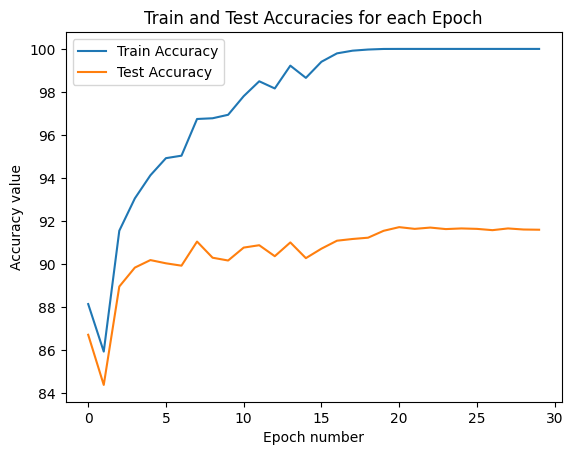

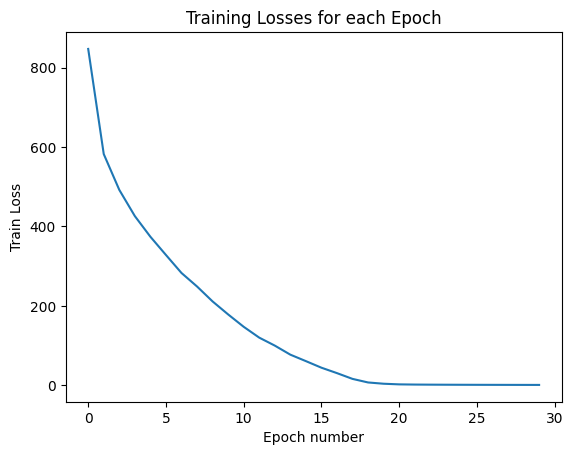

Last Train Accuracy: 100.0 Last Test Accuracy: 91.6


In [ ]:
#tanh
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with Tanh actiovation on device
net = MyCNN(nn.Tanh()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization with learning rate 0.1
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 4339.503911972046, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 2710.8110706210136, train accuracy: 64.895, test accuracy:63.83
Epoch 3: loss: 1432.3735374510288, train accuracy: 69.21166666666667, test accuracy:68.27
Epoch 4: loss: 1234.6466220021248, train accuracy: 73.29166666666667, test accuracy:72.69
Epoch 5: loss: 1120.6796490252018, train accuracy: 77.35833333333333, test accuracy:76.67
Epoch 6: loss: 1021.8428442627192, train accuracy: 81.41333333333333, test accuracy:80.36
Epoch 7: loss: 940.6401720494032, train accuracy: 81.65166666666667, test accuracy:80.32
Epoch 8: loss: 875.1537208631635, train accuracy: 82.68666666666667, test accuracy:81.5
Epoch 9: loss: 821.8844254016876, train accuracy: 83.60166666666667, test accuracy:82.76
Epoch 10: loss: 776.4674665108323, train accuracy: 84.31166666666667, test accuracy:83.47
Epoch 11: loss: 739.5928154364228, train accuracy: 86.625, test accuracy:85.5
Epoch 12: loss: 710.1506055444479, train accu

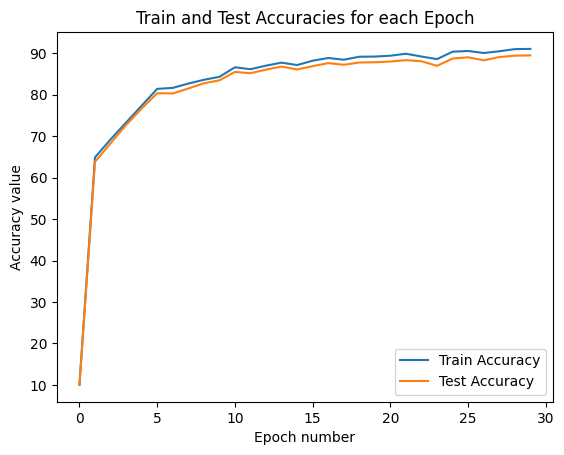

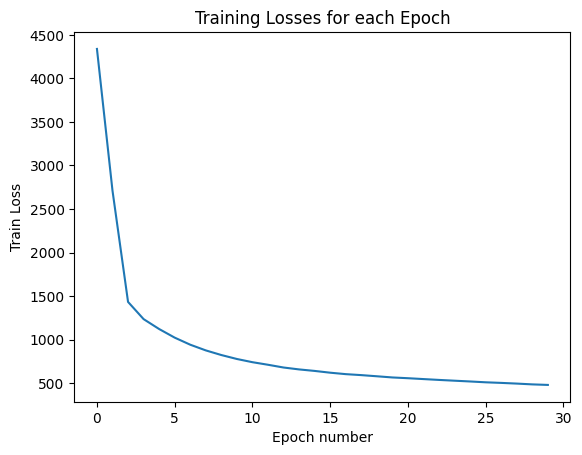

Last Train Accuracy: 91.05 Last Test Accuracy: 89.49


In [ ]:
#sigmoid
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with Sigmoid actiovation on device
net = MyCNN(nn.Sigmoid()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization with learning rate 0.1
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 820.6971808671951, train accuracy: 88.13833333333334, test accuracy:86.65
Epoch 2: loss: 567.0847447961569, train accuracy: 90.50833333333334, test accuracy:88.59
Epoch 3: loss: 485.30379572696984, train accuracy: 91.74333333333334, test accuracy:89.21
Epoch 4: loss: 426.99801275879145, train accuracy: 93.24333333333334, test accuracy:90.27
Epoch 5: loss: 376.099765422754, train accuracy: 94.50666666666666, test accuracy:90.58
Epoch 6: loss: 334.5375979915261, train accuracy: 94.43166666666667, test accuracy:90.41
Epoch 7: loss: 297.4258254109882, train accuracy: 95.755, test accuracy:90.91
Epoch 8: loss: 266.2646442059777, train accuracy: 95.16, test accuracy:90.4
Epoch 9: loss: 231.64083184092306, train accuracy: 96.06, test accuracy:90.16
Epoch 10: loss: 205.10876873345114, train accuracy: 95.145, test accuracy:89.51
Epoch 11: loss: 184.8671445249347, train accuracy: 97.53, test accuracy:90.94
Epoch 12: loss: 167.76823553815484, train accuracy: 95.3516666666666

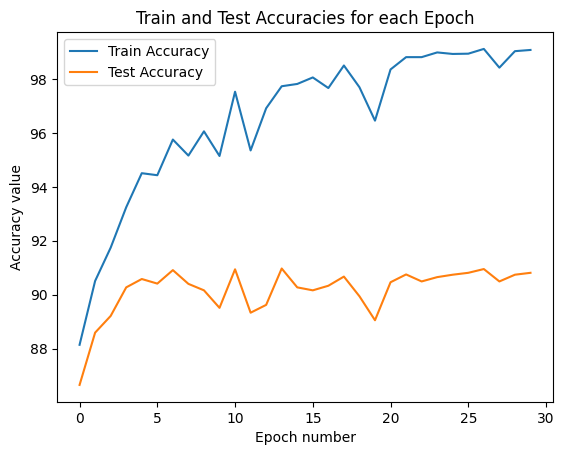

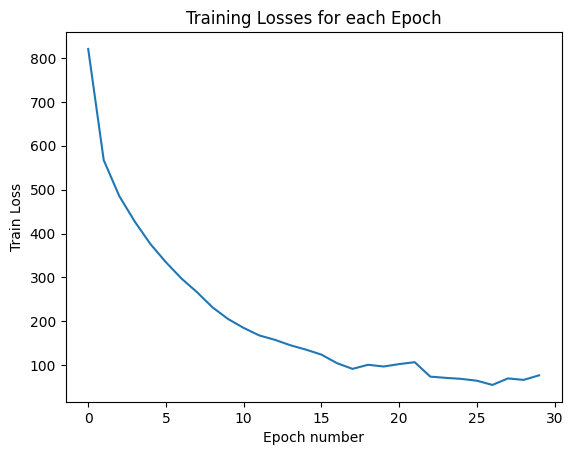

Last Train Accuracy: 99.08 Last Test Accuracy: 90.81


In [ ]:
#ELU
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with ELU actiovation on device
net = MyCNN(nn.ELU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization with learning rate 0.1
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

4. Keeping ReLU, use 5 different learning rates: 0.001, 0.1, 0.5, 1, 10. In your report, provide the
final train loss, as well as the final accuracy values for both train and test for each learning rate
and comment on the trade-offs between speed and stability of convergence. Comment on why
you get the Nan loss if any.
This question carries 9% of the mark for this coursework.

cuda:0
Epoch 1: loss: 2742.7988161444664, train accuracy: 68.035, test accuracy:67.45
Epoch 2: loss: 1450.7641777992249, train accuracy: 72.89333333333333, test accuracy:71.98
Epoch 3: loss: 1285.9552017450333, train accuracy: 73.73, test accuracy:72.79
Epoch 4: loss: 1191.8618820607662, train accuracy: 76.97166666666666, test accuracy:75.99
Epoch 5: loss: 1120.4086170196533, train accuracy: 77.97833333333334, test accuracy:76.68
Epoch 6: loss: 1064.30270396173, train accuracy: 79.27166666666666, test accuracy:78.54
Epoch 7: loss: 1018.7276464998722, train accuracy: 81.43833333333333, test accuracy:80.29
Epoch 8: loss: 978.1124517917633, train accuracy: 80.16, test accuracy:78.99
Epoch 9: loss: 942.5072035342455, train accuracy: 82.57, test accuracy:82.01
Epoch 10: loss: 909.8089636713266, train accuracy: 83.47833333333334, test accuracy:82.69
Epoch 11: loss: 884.6053884029388, train accuracy: 81.56833333333333, test accuracy:80.46
Epoch 12: loss: 860.1540741026402, train accuracy: 84.

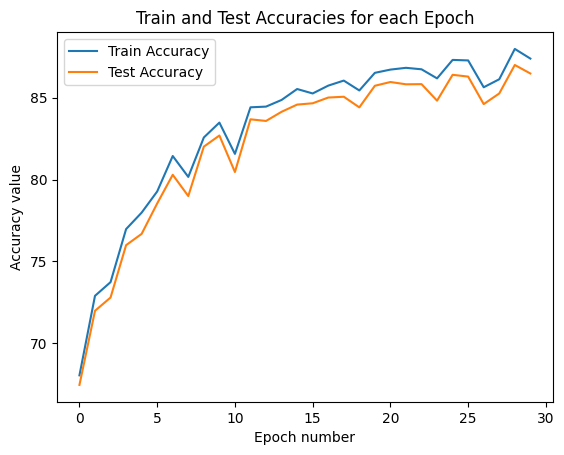

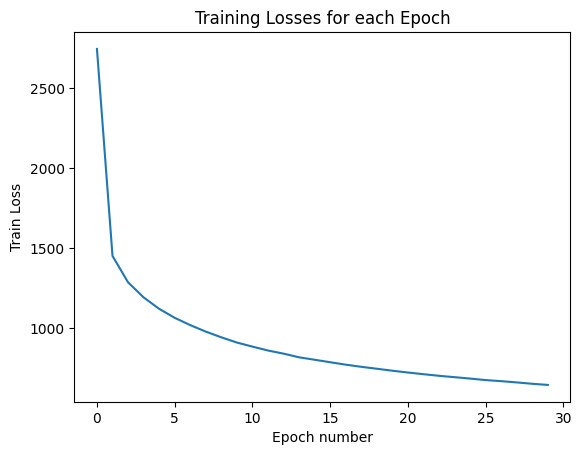

Last Train Accuracy: 87.39166666666667 Last Test Accuracy: 86.48


In [ ]:
#ReLU lr 0.001
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with ReLU actiovation on device
net = MyCNN(nn.ReLU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization
opt = torch.optim.SGD(list(net.parameters()), lr = 0.001)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 954.0194464847445, train accuracy: 87.47, test accuracy:86.62
Epoch 2: loss: 589.9162742346525, train accuracy: 90.08666666666667, test accuracy:88.55
Epoch 3: loss: 506.70039725489914, train accuracy: 91.71833333333333, test accuracy:89.8
Epoch 4: loss: 445.85460938327014, train accuracy: 92.26666666666667, test accuracy:89.82
Epoch 5: loss: 399.4193248935044, train accuracy: 93.26, test accuracy:90.32
Epoch 6: loss: 361.33845635224134, train accuracy: 93.27833333333334, test accuracy:89.93
Epoch 7: loss: 323.7687855614349, train accuracy: 94.21, test accuracy:90.15
Epoch 8: loss: 292.60380900185555, train accuracy: 95.20166666666667, test accuracy:90.84
Epoch 9: loss: 259.2821691306308, train accuracy: 95.87333333333333, test accuracy:90.77
Epoch 10: loss: 232.40172144945245, train accuracy: 96.19666666666667, test accuracy:90.66
Epoch 11: loss: 208.4823247330496, train accuracy: 96.26333333333334, test accuracy:90.62
Epoch 12: loss: 185.8723531542346, train acc

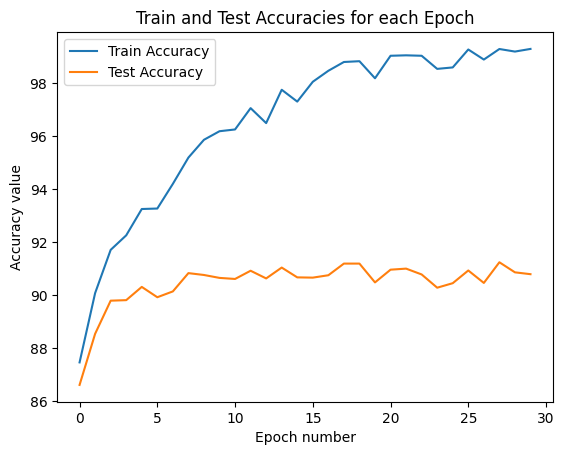

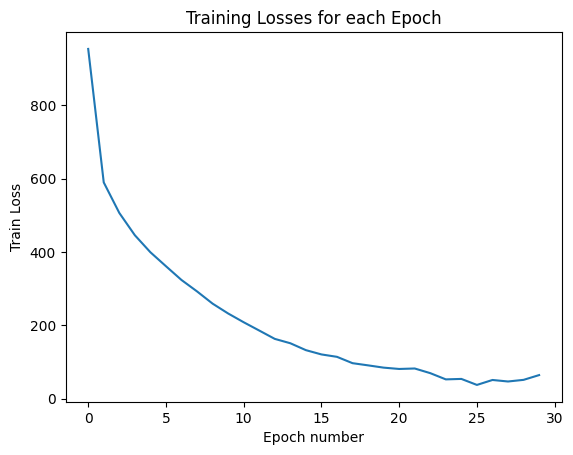

Last Train Accuracy: 99.30333333333333 Last Test Accuracy: 90.8


In [ ]:
#ReLU lr 0.1
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with ReLU actiovation on device
net = MyCNN(nn.ReLU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 1119.6155227273703, train accuracy: 85.26333333333334, test accuracy:84.37
Epoch 2: loss: 708.3337676748633, train accuracy: 86.69833333333334, test accuracy:85.2
Epoch 3: loss: 629.9292121008039, train accuracy: 88.12, test accuracy:86.53
Epoch 4: loss: 578.6718637347221, train accuracy: 88.9, test accuracy:86.66
Epoch 5: loss: 535.2904040236026, train accuracy: 90.31, test accuracy:87.62
Epoch 6: loss: 515.9531926717609, train accuracy: 90.96833333333333, test accuracy:88.27
Epoch 7: loss: 492.34611544944346, train accuracy: 91.17666666666666, test accuracy:88.07
Epoch 8: loss: 475.07296828273684, train accuracy: 91.31666666666666, test accuracy:87.43
Epoch 9: loss: 465.7736652670428, train accuracy: 90.745, test accuracy:87.49
Epoch 10: loss: 457.9553561443463, train accuracy: 90.80833333333334, test accuracy:86.93
Epoch 11: loss: 488.60296682082117, train accuracy: 87.94333333333333, test accuracy:85.32
Epoch 12: loss: 504.4220640640706, train accuracy: 92.138

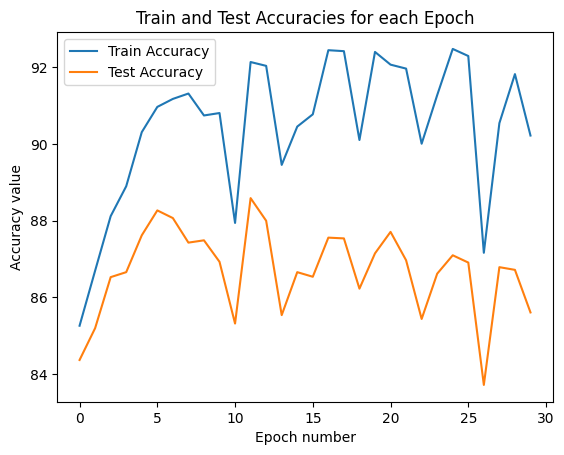

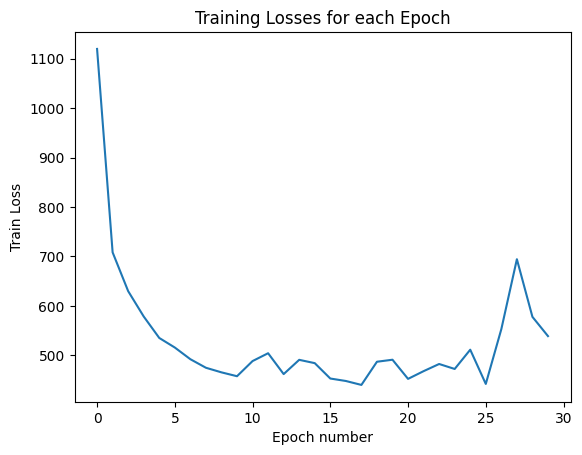

Last Train Accuracy: 90.22166666666666 Last Test Accuracy: 85.61


In [ ]:
#ReLU lr 0.5
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with ReLU actiovation on device
net = MyCNN(nn.ReLU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization
opt = torch.optim.SGD(list(net.parameters()), lr = 0.5)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 4334.0133583545685, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 4331.141119003296, train accuracy: 10.0, test accuracy:10.0
Epoch 3: loss: 4331.308682918549, train accuracy: 10.0, test accuracy:10.0
Epoch 4: loss: 4331.137816667557, train accuracy: 10.0, test accuracy:10.0
Epoch 5: loss: 4331.640677213669, train accuracy: 10.0, test accuracy:10.0
Epoch 6: loss: 4331.572793006897, train accuracy: 10.0, test accuracy:10.0
Epoch 7: loss: 4331.112623691559, train accuracy: 10.0, test accuracy:10.0
Epoch 8: loss: 4331.07105588913, train accuracy: 10.0, test accuracy:10.0
Epoch 9: loss: 4331.8130605220795, train accuracy: 10.0, test accuracy:10.0
Epoch 10: loss: 4331.277065753937, train accuracy: 10.0, test accuracy:10.0
Epoch 11: loss: 4331.804905414581, train accuracy: 10.0, test accuracy:10.0
Epoch 12: loss: 4331.6799211502075, train accuracy: 10.0, test accuracy:10.0
Epoch 13: loss: 4331.021770000458, train accuracy: 10.0, test accuracy:10.0
Epoch 14: lo

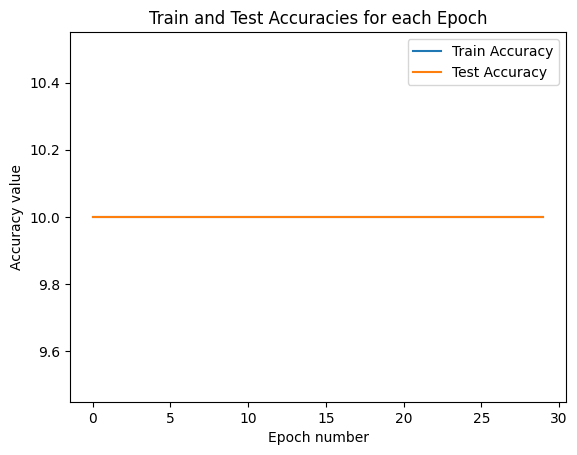

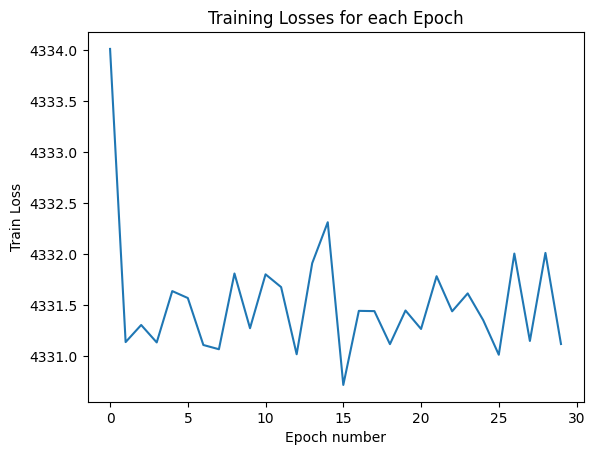

Last Train Accuracy: 10.0 Last Test Accuracy: 10.0


In [ ]:
#ReLU lr 1
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with ReLU actiovation on device
net = MyCNN(nn.ReLU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization
opt = torch.optim.SGD(list(net.parameters()), lr = 1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

cuda:0
Epoch 1: loss: 7.466362224217005e+28, train accuracy: 10.0, test accuracy:10.0
Epoch 2: loss: 4636.331986665726, train accuracy: 10.0, test accuracy:10.0
Epoch 3: loss: 4642.9177849292755, train accuracy: 10.0, test accuracy:10.0
Epoch 4: loss: 4645.379534482956, train accuracy: 10.0, test accuracy:10.0
Epoch 5: loss: 4634.166651010513, train accuracy: 10.0, test accuracy:10.0
Epoch 6: loss: 4642.585894346237, train accuracy: 10.0, test accuracy:10.0
Epoch 7: loss: 4628.022428274155, train accuracy: 10.0, test accuracy:10.0
Epoch 8: loss: 4629.858188867569, train accuracy: 10.0, test accuracy:10.0
Epoch 9: loss: 4643.517793178558, train accuracy: 10.0, test accuracy:10.0
Epoch 10: loss: 4639.99128818512, train accuracy: 10.0, test accuracy:10.0
Epoch 11: loss: 4634.115220546722, train accuracy: 10.0, test accuracy:10.0
Epoch 12: loss: 4639.422166109085, train accuracy: 10.0, test accuracy:10.0
Epoch 13: loss: 4636.527693271637, train accuracy: 10.0, test accuracy:10.0
Epoch 14: 

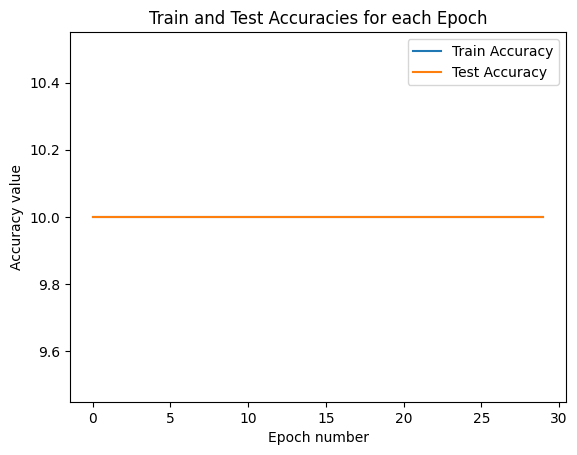

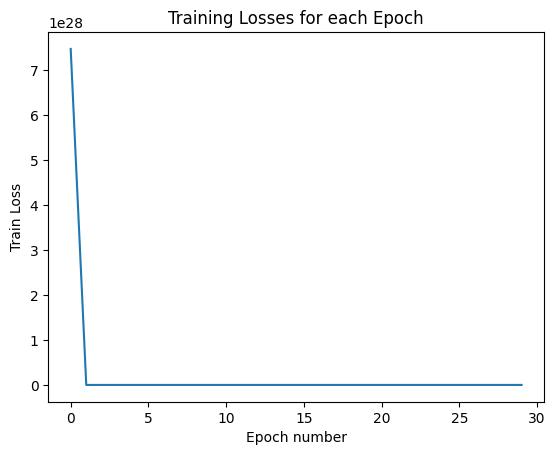

Last Train Accuracy: 10.0 Last Test Accuracy: 10.0


In [ ]:
#ReLU lr 10
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")
# create a CNN instance with ReLU actiovation on device
net = MyCNN(nn.ReLU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization
opt = torch.optim.SGD(list(net.parameters()), lr = 10)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)

5. Add a dropout of 0.3 rate on the second fully connected layer (keeping ReLU and learning rate 0.1)
0.1). In your report, provide the final train and test accuracy values and explain how the dropout
affects the performance.
This question carries 10% of the mark for this coursework.

In [ ]:
class MyCNN2(nn.Module):
  def __init__(self, activation_function):
    super(MyCNN2, self).__init__()
    # TO DO

    # use the Sequential container to run layers sequentially

    self.cnn_model = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride=2),
                                   nn.Conv2d(32, 64, kernel_size = 5), activation_function, nn.MaxPool2d(2, stride = 2))

    # use the Sequential container to run layers sequentially

    self.fc_model = nn.Sequential(nn.Linear(1024, 1024), activation_function, nn.Linear(1024,256), activation_function, nn.Dropout(0.3), nn.Linear(256, 10))

  def forward(self, x):
    # TO DO
    #  use the Sequential container to run layers sequentially
    # pass input to cnn model
    x = self.cnn_model(x)
    # reshape the result
    x = x.view(x.size(0), -1)
    # x = x.view(-1, 1024)
    # pass the result to the fully connected model and return it
    x = self.fc_model(x)

    return x

cuda:0
Epoch 1: loss: 985.8801469579339, train accuracy: 87.67333333333333, test accuracy:86.87
Epoch 2: loss: 612.5126756373793, train accuracy: 89.37666666666667, test accuracy:87.45
Epoch 3: loss: 527.0386864822358, train accuracy: 89.28, test accuracy:87.55
Epoch 4: loss: 471.8157117180526, train accuracy: 91.52166666666666, test accuracy:89.38
Epoch 5: loss: 427.65377923846245, train accuracy: 92.97333333333333, test accuracy:89.99
Epoch 6: loss: 392.57916701212525, train accuracy: 93.63, test accuracy:90.62
Epoch 7: loss: 359.6415432803333, train accuracy: 93.85833333333333, test accuracy:90.5
Epoch 8: loss: 324.6693422575481, train accuracy: 94.34333333333333, test accuracy:90.36
Epoch 9: loss: 300.2883556392044, train accuracy: 94.86166666666666, test accuracy:90.63
Epoch 10: loss: 271.17722116876394, train accuracy: 95.86166666666666, test accuracy:90.84
Epoch 11: loss: 251.07042381213978, train accuracy: 95.895, test accuracy:90.95
Epoch 12: loss: 229.66417774558067, train ac

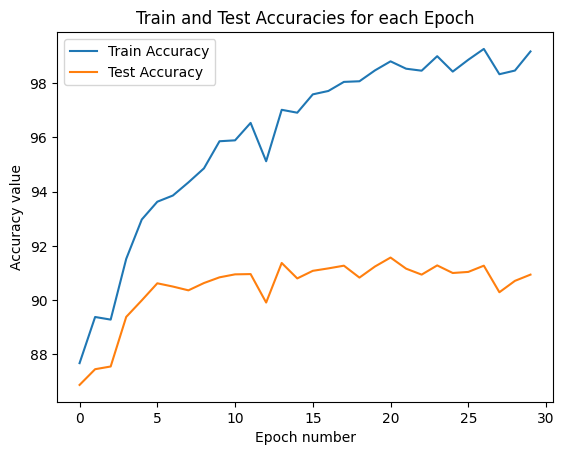

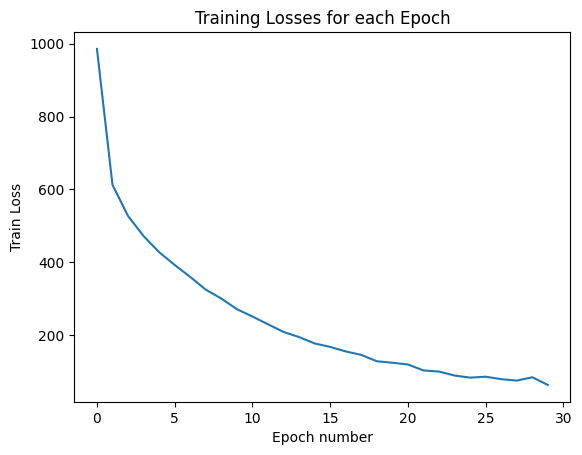

Last Train Accuracy: 99.175 Last Test Accuracy: 90.94


In [ ]:
#ReLU lr 0.1
# check if we have gpu and if not use cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# device = torch.device("cuda:0")

# create a CNN instance with ReLU actiovation on device
net = MyCNN2(nn.ReLU()).to(device)
# intialize the network by the weights function
net.apply(weights_init)
# define cross entropy as loss function
loss_fn = nn.CrossEntropyLoss()
# use stochastic gradiant method for optimization with learning rate 0.1
opt = torch.optim.SGD(list(net.parameters()), lr = 0.1)

loss_epoch_array, train_accuracy,test_accuracy = train(net, loss_fn, opt, device, train_loader)

plot_accuracies(train_accuracy,test_accuracy)
plot_loss_epoch(loss_epoch_array)
show_final_accuracies(train_accuracy,test_accuracy)